In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# cencus = pd.read_csv("Family Income and Expenditure.csv")

In [ ]:
census.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [ ]:
census['Region'].value_counts()

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64

In [ ]:
census['Main Source of Income'].value_counts()

Main Source of Income
Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: count, dtype: int64

In [ ]:
census['Bread and Cereals Expenditure'].value_counts()

Bread and Cereals Expenditure
0        15
20734     9
8758      8
15520     8
21930     8
         ..
24887     1
8196      1
16396     1
11196     1
16430     1
Name: count, Length: 26082, dtype: int64

In [ ]:
census['Total Rice Expenditure'].value_counts()

Total Rice Expenditure
0        715
11700     95
14480     94
15600     92
10400     89
        ... 
25190      1
36312      1
43239      1
39217      1
38213      1
Name: count, Length: 16145, dtype: int64

In [ ]:
census['Meat Expenditure'].value_counts()

Meat Expenditure
0        346
900       41
1620      39
1740      38
960       33
        ... 
1763       1
4246       1
2779       1
8693       1
16123      1
Name: count, Length: 18619, dtype: int64

In [ ]:
census['Transportation Expenditure'].value_counts()

Transportation Expenditure
0        309
1200     266
2400     232
1800     222
960      217
        ... 
27348      1
19734      1
37176      1
24426      1
91500      1
Name: count, Length: 7435, dtype: int64

In [ ]:
census['Total Income from Entrepreneurial Acitivites']

0         44370
1             0
2             0
3         15580
4         75687
          ...  
41539     94120
41540     78270
41541     98545
41542    107435
41543    105547
Name: Total Income from Entrepreneurial Acitivites, Length: 41544, dtype: int64

In [ ]:
census['Household Head Sex'].value_counts()

Household Head Sex
Male      32483
Female     9061
Name: count, dtype: int64

In [ ]:
census['Household Head Age'].value_counts()

Household Head Age
53    1146
46    1140
45    1133
49    1123
50    1123
      ... 
97       3
13       2
10       1
14       1
9        1
Name: count, Length: 89, dtype: int64

In [ ]:
census['Household Head Marital Status'].value_counts()

Household Head Marital Status
Married               31347
Widowed                6818
Single                 1942
Divorced/Separated     1425
Annulled                 11
Unknown                   1
Name: count, dtype: int64

In [ ]:
census['Household Head Highest Grade Completed'].value_counts()

Household Head Highest Grade Completed
High School Graduate                                                                                                                                                                                                   9628
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                          

In [ ]:
census['Household Head Job or Business Indicator'].value_counts()

Household Head Job or Business Indicator
With Job/Business    34008
No Job/Business       7536
Name: count, dtype: int64

In [ ]:
census['Household Head Occupation'].value_counts()

Household Head Occupation
Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
Corn farmers                                                                           1724
                                                                                       ... 
Coding, proof-reading and related clerks                                                  1
Advertising and public relations managers                                                 1
Wood treaters                                                                             1
Aircraft pilots, navigators and flight engineers                                          1
Glass, ceramics and related plant operators n. e. c.  

In [ ]:
census['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

In [ ]:
census['Type of Household'].value_counts()

Type of Household
Single Family                             28445
Extended Family                           12932
Two or More Nonrelated Persons/Members      167
Name: count, dtype: int64

In [ ]:
census['Total Number of Family members'].value_counts()

Total Number of Family members
4     7921
5     7165
3     6509
6     5222
2     4659
7     3222
1     2511
8     1984
9     1063
10     621
11     311
12     156
13      80
14      51
15      36
16      14
17       7
18       5
20       4
19       2
26       1
Name: count, dtype: int64

In [ ]:
census['Members with age less than 5 year old'].value_counts()

Members with age less than 5 year old
0    28705
1     9317
2     2933
3      511
4       64
5       14
Name: count, dtype: int64

In [ ]:
census['Members with age 5 - 17 years old'].value_counts()

Members with age 5 - 17 years old
0    14802
1    10445
2     8111
3     4704
4     2152
5      896
6      318
7       96
8       20
Name: count, dtype: int64

In [ ]:
census['Total number of family members employed'].value_counts()

Total number of family members employed
1    15312
0    11494
2     9303
3     3579
4     1280
5      415
6      116
7       33
8       12
Name: count, dtype: int64

In [ ]:
census['Type of Building/House'].value_counts()

Type of Building/House
Single house                                   39069
Multi-unit residential                          1329
Duplex                                          1084
Commercial/industrial/agricultural building       51
Institutional living quarter                       9
Other building unit (e.g. cave, boat)              2
Name: count, dtype: int64

In [ ]:
census['Type of Roof'].value_counts()

Type of Roof
Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)    33342
Light material (cogon,nipa,anahaw)                                         5074
Mixed but predominantly strong materials                                   2002
Mixed but predominantly light materials                                     846
Salvaged/makeshift materials                                                212
Mixed but predominantly salvaged materials                                   56
Not Applicable                                                               12
Name: count, dtype: int64

In [ ]:
census['Type of Walls'].value_counts()

Type of Walls
Strong            27739
Light              8267
Quite Strong       3487
Very Light         1583
Salvaged            456
NOt applicable       12
Name: count, dtype: int64

In [ ]:
census['House Floor Area'].value_counts()

House Floor Area
30     2976
20     2903
40     2643
50     2237
80     1838
       ... 
279       1
275       1
226       1
254       1
151       1
Name: count, Length: 313, dtype: int64

In [ ]:
census['House Age'].value_counts()

House Age
15     3382
25     2206
20     2072
35     1559
5      1553
       ... 
105       1
200       1
91        1
94        1
132       1
Name: count, Length: 111, dtype: int64

In [ ]:
census['Number of bedrooms'].value_counts()

Number of bedrooms
2    15456
1    13431
3     6111
0     3930
4     1875
5      484
6      169
7       46
8       29
9       13
Name: count, dtype: int64

In [ ]:
census['Tenure Status'].value_counts()

Tenure Status
Own or owner-like possession of house and lot        29541
Own house, rent-free lot with consent of owner        6165
Rent house/room including lot                         2203
Rent-free house and lot with consent of owner         2014
Own house, rent-free lot without consent of owner      995
Own house, rent lot                                    425
Rent-free house and lot without consent of owner       128
Not Applicable                                          73
Name: count, dtype: int64

In [ ]:
census['Toilet Facilities'].value_counts()

Toilet Facilities
Water-sealed, sewer septic tank, used exclusively by household    29162
Water-sealed, sewer septic tank, shared with other household       3694
Water-sealed, other depository, used exclusively by household      2343
Closed pit                                                         2273
Open pit                                                           1189
Water-sealed, other depository, shared with other household         950
Others                                                              353
Name: count, dtype: int64

In [ ]:
census['Electricity'].value_counts()

Electricity
1    37008
0     4536
Name: count, dtype: int64

In [ ]:
census['Main Source of Water Supply'].value_counts()

Main Source of Water Supply
Own use, faucet, community water system    16093
Shared, tubed/piped deep well               6242
Shared, faucet, community water system      4614
Own use, tubed/piped deep well              4587
Dug well                                    3876
Protected spring, river, stream, etc        2657
Tubed/piped shallow well                    1394
Peddler                                      851
Unprotected spring, river, stream, etc       607
Lake, river, rain and others                 496
Others                                       127
Name: count, dtype: int64

In [ ]:
census['Number of Television'].value_counts()

Number of Television
1    27089
0    10717
2     2955
3      597
4      133
5       42
6       11
Name: count, dtype: int64

In [ ]:
census['Number of CD/VCD/DVD'].value_counts()

Number of CD/VCD/DVD
0    24621
1    15983
2      752
3      163
4       20
5        5
Name: count, dtype: int64

In [ ]:
census['Number of Component/Stereo set'].value_counts()

Number of Component/Stereo set
0    35058
1     6284
2      174
3       13
4       10
5        5
Name: count, dtype: int64

In [ ]:
census['Number of Refrigerator/Freezer'].value_counts()

Number of Refrigerator/Freezer
0    25990
1    14881
2      569
3       73
4       17
5       14
Name: count, dtype: int64

In [ ]:
census['Number of Washing Machine'].value_counts()

Number of Washing Machine
0    28484
1    12845
2      204
3       11
Name: count, dtype: int64

In [39]:
cencus['Number of Washing Machine'].value_counts()

Number of Washing Machine
0    28484
1    12845
2      204
3       11
Name: count, dtype: int64

In [40]:
cencus['Number of Airconditioner'].value_counts()

Number of Airconditioner
0    37457
1     3178
2      622
3      199
4       66
5       22
Name: count, dtype: int64

In [41]:
cencus['Number of Car, Jeep, Van'].value_counts()

Number of Car, Jeep, Van
0    38876
1     2136
2      413
3       77
4       29
5       13
Name: count, dtype: int64

In [42]:
cencus['Number of Landline/wireless telephones'].value_counts()

Number of Landline/wireless telephones
0    39302
1     2070
2       96
3       48
4       28
Name: count, dtype: int64

In [43]:
cencus['Number of Cellular phone'].value_counts()

Number of Cellular phone
1     12484
2     10377
0      6939
3      5820
4      3281
5      1467
6       666
7       242
8       153
10       66
9        49
Name: count, dtype: int64

In [44]:
cencus['Number of Personal Computer'].value_counts()

Number of Personal Computer
0    32988
1     5650
2     1836
3      667
4      271
5      112
6       20
Name: count, dtype: int64

In [45]:
cencus['Number of Stove with Oven/Gas Range'].value_counts()

Number of Stove with Oven/Gas Range
0    36101
1     5287
2      145
3       11
Name: count, dtype: int64

In [46]:
cencus['Number of Motorized Banca'].value_counts()

Number of Motorized Banca
0    41055
1      444
2       34
3       11
Name: count, dtype: int64

In [47]:
cencus['Number of Motorcycle/Tricycle'].value_counts()

Number of Motorcycle/Tricycle
0    31282
1     8811
2     1199
3      186
4       54
5       12
Name: count, dtype: int64

<h1>Exploratory Data Analysis<h1>

In [48]:
census = pd.read_csv("Family Income and Expenditure.csv")

In [ ]:
#getting the objects dtypes columns 
object_cols = census.select_dtypes(include=['object']).columns.tolist()
object_cols

#converting objects into category 
for column in object_cols:
    census[column] = census[column].astype('category')

census.dtypes.head(4)

Total Household Income       int64
Region                    category
Total Food Expenditure       int64
Main Source of Income     category
dtype: object

In [50]:
#Dividing region in 3 main island Luzonl, visasyas, and mindanao
luzon_list = ['CAR', 'NCR', 'III - Central Luzon', 'V - Bicol Region', 'I - Ilocos Region', 'II - Cagayan Valley', 'IVA - CALABARZON', 'IVB - MIMAROPA']

visayas_regions_list = ['VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas']
mindanao_regions_list = ['Caraga', 'ARMM', 'X - Northern Mindanao', 'XI - Davao Region', 'XII - SOCCSKSARGEN', 'IX - Zamboanga Peninsula']

luzon = census[census['Region'].isin(luzon_list)]

visayas = census[census['Region'].isin(visayas_regions_list)]
mindanao = census[census['Region'].isin(mindanao_regions_list)]


<h2>1. Regional Cost of Living: Where Survival Is Hardest</h2>


In [51]:
#jp1  (example update ni steven)

<h2>2. The Regional “Saving Gap”: Which Regions Can Actually Save?</h2>


In [52]:
#jp2

<h2>3. Are Rural or Urban Households More Financially Vulnerable?</h2>


In [53]:
#jp3

<h2>4. The Hidden Poverty Behind the Walls</h2>


In [54]:
#jp4

<h2>5. “Imputed Rental” Inequality</h2>


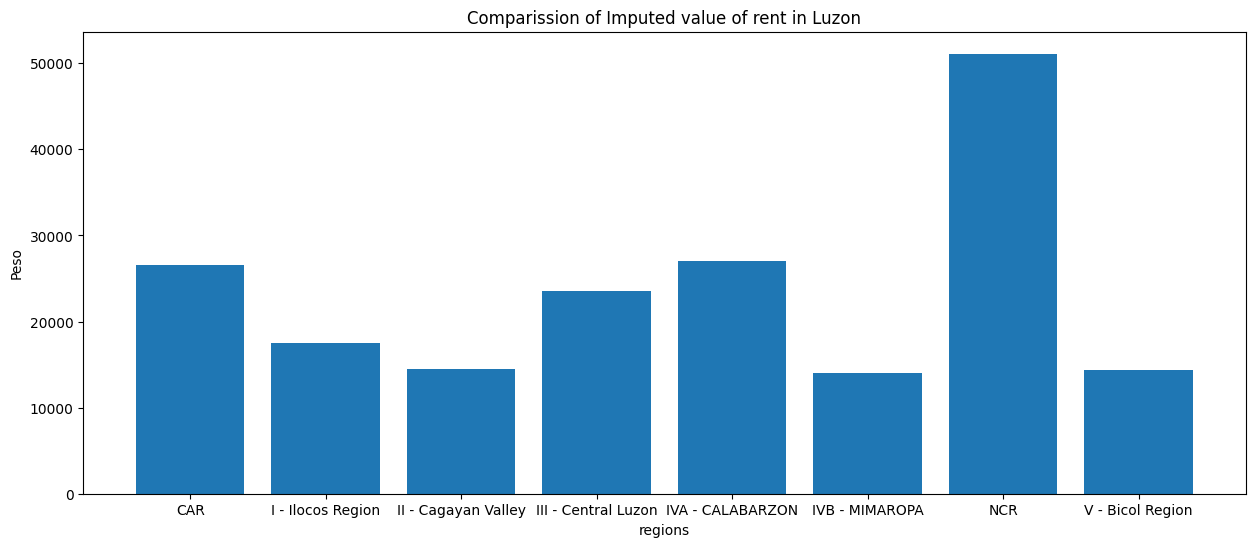

In [55]:
census['Total Household Income']
imputed_rental_per_region = luzon.groupby(['Region'])['Imputed House Rental Value'].mean()
plt.figure(figsize=(15, 6))  
plt.title('Comparission of Imputed value of rent in Luzon')
plt.xlabel('regions')
plt.ylabel('Peso')
plt.bar(imputed_rental_per_region.index, imputed_rental_per_region.values)
plt.show()


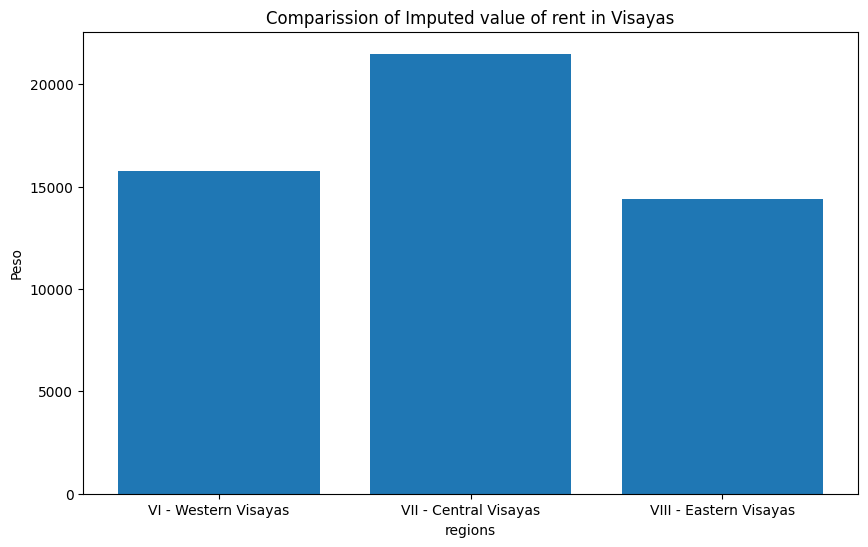

In [56]:

imputed_rental_per_region = visayas.groupby(['Region'])['Imputed House Rental Value'].mean()
plt.figure(figsize=(10, 6))  
plt.title('Comparission of Imputed value of rent in Visayas')
plt.xlabel('regions')
plt.ylabel('Peso')
plt.bar(imputed_rental_per_region.index, imputed_rental_per_region.values)
plt.show()


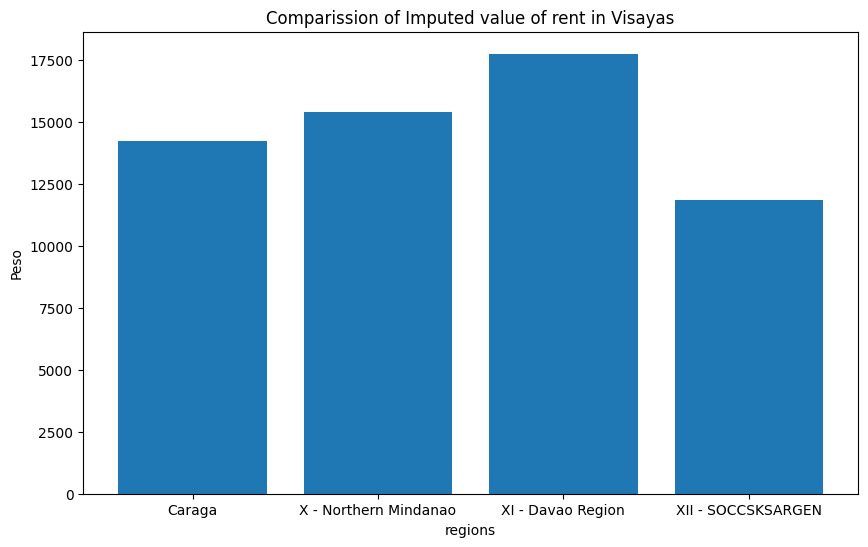

In [57]:

imputed_rental_per_region = mindanao.groupby(['Region'])['Imputed House Rental Value'].mean()
plt.figure(figsize=(10, 6))  
plt.title('Comparission of Imputed value of rent in Visayas')
plt.xlabel('regions')
plt.ylabel('Peso')
plt.bar(imputed_rental_per_region.index, imputed_rental_per_region.values)
plt.show()


<h2>6. Toilet & Water Access as a Poverty Indicator</h2>


In [58]:
#steven
census['Toilet Facilities'].value_counts()

Toilet Facilities
Water-sealed, sewer septic tank, used exclusively by household    29162
Water-sealed, sewer septic tank, shared with other household       3694
Water-sealed, other depository, used exclusively by household      2343
Closed pit                                                         2273
Open pit                                                           1189
Water-sealed, other depository, shared with other household         950
Others                                                              353
Name: count, dtype: int64

<h2>7. Large Families, Small Budgets</h2>


In [59]:
#steven

<h2>8. Does Education Suffer with More Kids?</h2>


In [60]:
#jp5

<h2>9. Child-Heavy Households and Poverty Correlation</h2>


In [61]:
#steven

<h2>10. Who Are the Working Poor?</h2>


In [62]:
#steven

<h2>11. Entrepreneurial Families: Are They Better Off?</h2>


<Axes: xlabel='Main Source of Income'>

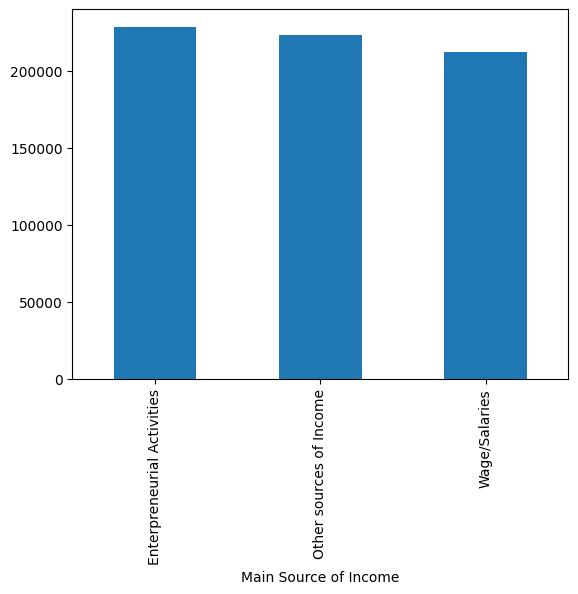

In [ ]:
#steven

#are are only slight difference between the total numner ob household income in one employed doing entreprenuerial activies 
entreprenuer = census[census['Total Income from Entrepreneurial Acitivites'] != 0 ]
entreprenuer = entreprenuer[entreprenuer['Total number of family members employed']  == 1]
#kinita pera ng wage salaries compare sa entreprenuers 

entrep_main = entreprenuer.groupby(['Main Source of Income'])['Total Household Income'].mean()

entrep_main.plot(kind='bar')

<h2>12. Occupation vs. Income Ranking</h2>


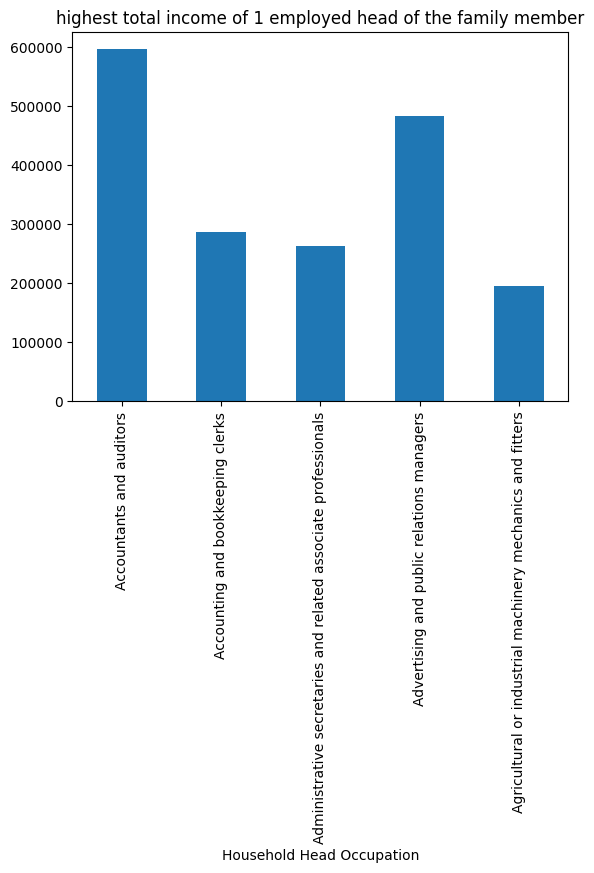

In [109]:
#steven
census['Household Head Occupation'].value_counts()
income_head = census.groupby(['Household Head Occupation'])['Total Household Income'].mean()
income_head

#dito makikita natin na ang may pinakamalaking household na sweldo ay ang mga accountants saka auditor yan yung total bali try natin yung 
#iisa lang ang employe sa familya 
#ok still auditor 
soloworker = census[census['Total number of family members employed'] == 1]
income_head_solo = soloworker.groupby(['Household Head Occupation'])['Total Household Income'].mean().head()
income_head_solo.plot(kind='bar')
plt.title('highest total income of 1 employed head of the family member')
plt.show()

In [98]:
census['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

<h2>Mas alchoholic ba ang mga mahihirap at mabibisyo ba ang mahihirap kesa sa mayaman?<h2>

<h2>13. Food vs. Vices</h2>


In [65]:
#steven

<h2>14. Education vs. Entertainment Spending</h2>


In [66]:
#jp6

<h2>15. Medical vs. Special Occasions: What Hurts Families Most?</h2>


In [67]:
#jp7

<h2>16. Digital Divide Across Regions</h2>


In [68]:
#steven

<h2>17. Are Airconditioners and Cars a Sign of Wealth?</h2>


In [69]:
#jp8

<h2>18. Appliance Ownership vs. Basic Needs</h2>


In [70]:
#steven

<h2>19. Does the Head’s Education Affect Household Income?</h2>


In [71]:
#steven

<h2>20. Are Educated Heads Better at Budgeting?</h2>


In [72]:
#steven 

<h2>21. The “Invisible Rich”: Low Income, High Assets</h2>


In [73]:
#steven

<h2>22. High Expenditure, Low Income = Debt?</h2>


In [74]:
#steven

<h2>23. Senior-Headed Households: Are They Poorer?</h2>


In [75]:
#steven

<h2>24. Gender and Poverty</h2>


In [76]:
#jp9

<h2>25. Who Spends More on Transportation?</h2>


In [77]:
#jp10